In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from PIL import Image

# 1.Memuat Data

In [2]:
# def load_images(directory):
#     images = []
#     for filename in os.listdir(directory):
#           img = Image.open(os.path.join(directory, filename))
#           img = img.resize((224, 224))
#           img = img.convert('RGB')
#           img = np.array(img) / 255.0
#           images.append(img)
#     return images

In [3]:
def load_images(directory):
    images = []
    for filename in os.listdir(directory):
        try:
            img_path = os.path.join(directory, filename)
            img = Image.open(img_path)
            img = img.resize((224, 224))
            img = img.convert('RGB')
            img = np.array(img) / 255.0
            images.append(img)
        except Exception as e:
            print(f"Error memproses file {filename}: {e}, dilewati...")
            continue
    return images

In [4]:
retina_normal_image = load_images("D:\\Data Sains dan Analitis\\Pertemuan 16 Project Akhir\\Deteksi_retina\\Data\\normal")
retina_retinopaty_image = load_images("D:\\Data Sains dan Analitis\\Pertemuan 16 Project Akhir\\Deteksi_retina\\Data\\diabetic_retinopathy")

Error memproses file 20170412202800866.jpg: image file is truncated (58 bytes not processed), dilewati...


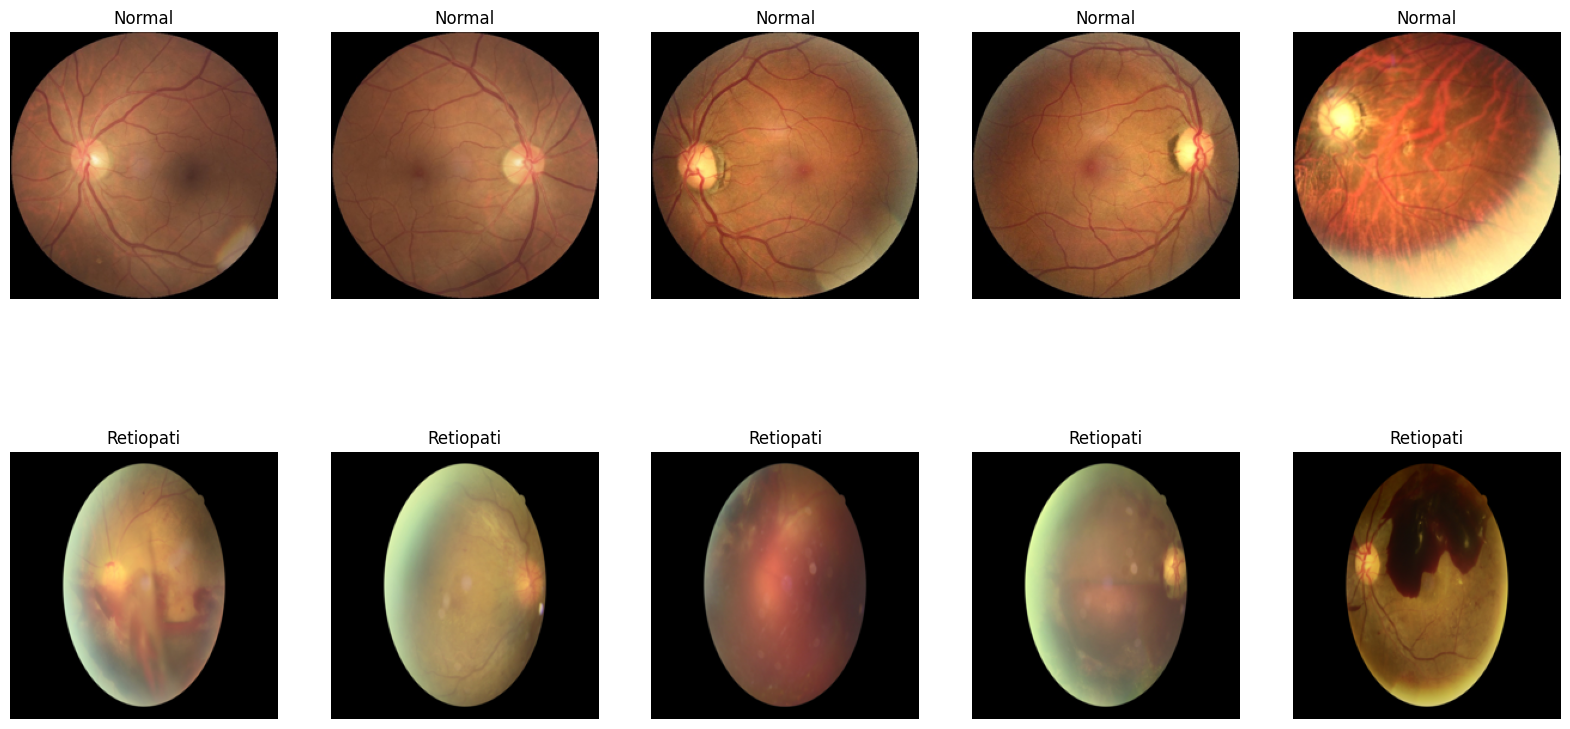

In [5]:
if len(retina_normal_image) >= 5 and len(retina_retinopaty_image) >= 5:
    
    fig, axes = plt.subplots(2, 5, figsize=(20, 10))
    for i in range(5):
        axes[0,i].imshow(retina_normal_image[i])
        axes[0,i].set_title("Normal")
        axes[0,i].axis('off')
        
    for i in range(5):
        axes[1,i].imshow(retina_retinopaty_image[i])
        axes[1,i].set_title("Retiopati")
        axes[1,i].axis("off")

    plt.show()
else :
    print("Gambar tidak cukup")


# 2.Labelling Data

In [6]:
def LabellingGambar(retina_normal, retina_retinopathy):
    retina_normal_label = np.zeros(len(retina_normal))
    retina_retinopaty_label = np.ones(len(retina_retinopathy))
    return retina_normal_label, retina_retinopaty_label

retina_normal_label, retina_retinopaty_label = LabellingGambar(retina_normal_image, retina_retinopaty_image)

In [7]:
retina_normal_label

array([0., 0., 0., ..., 0., 0., 0.])

In [8]:
len(retina_normal_image)

1074

In [9]:
retina_retinopaty_label

array([1., 1., 1., ..., 1., 1., 1.])

In [10]:
len(retina_retinopaty_image)

1504

In [11]:
data = retina_normal_image + retina_retinopaty_image
labels = np.concatenate((retina_normal_label, retina_retinopaty_label), axis=0)

In [12]:
labels

array([0., 0., 0., ..., 1., 1., 1.])

In [13]:
data

[array([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]),
 array([[[0., 0., 0.],
         [0., 0., 0.],
         

# 3. Pemisahan

In [14]:

X = np.array(data)
y = np.array(labels)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [16]:
import tensorflow as tf

# Menampilkan perangkat keras yang tersedia
print("Devices:", tf.config.list_physical_devices())

# Cek apakah GPU tersedia
if tf.config.list_physical_devices('GPU'):
    print("✅ GPU Terdeteksi dan Siap Digunakan")
else:
    print("❌ GPU Tidak Terdeteksi, Pakai CPU")


Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
❌ GPU Tidak Terdeteksi, Pakai CPU


In [17]:
train = tf.data.Dataset.from_tensor_slices((X_train,y_train))
test = tf.data.Dataset.from_tensor_slices((X_test,y_test))

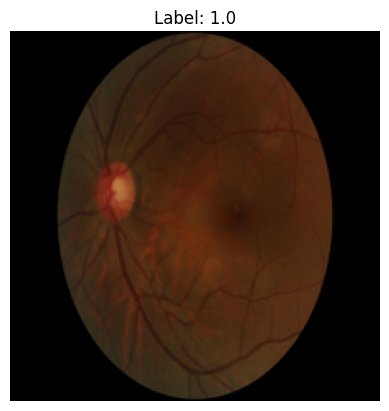

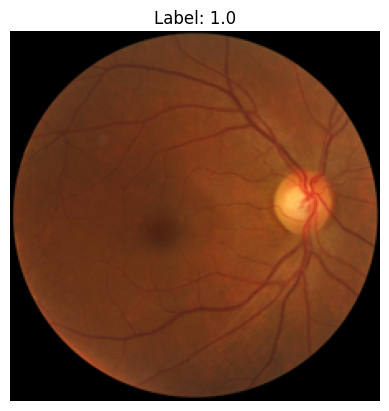

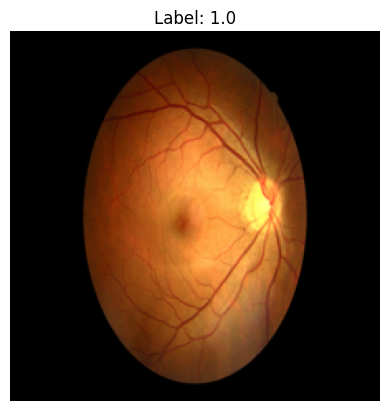

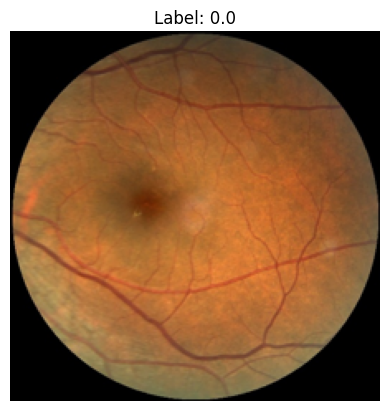

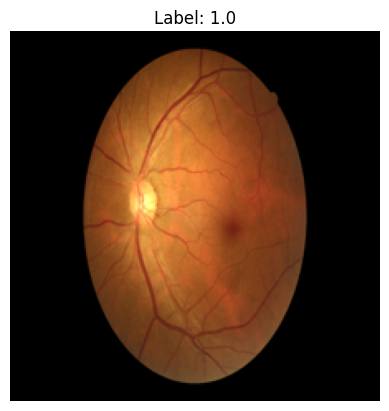

In [18]:
for image, label in train.take(5):
    plt.figure()
    plt.imshow(image.numpy())
    plt.title('Label: {}'.format(label.numpy()))
    plt.axis('off')
    plt.show()

In [19]:
total_data = len(data)
print(total_data)

2578


In [20]:
validation_size = int(0.1 * total_data)
train = train.skip(validation_size)
val = train.take(validation_size)

In [21]:
train_batch = train.batch(32)
test_batch = test.batch(32)
val = val.batch(32)

# 4. Arstiektur Model

In [22]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
model = Sequential()

model.add(Conv2D(32, (3,3), padding='valid', kernel_regularizer=l2(0.001), input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(256, kernel_regularizer=l2(0.001), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

d:\Python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,796,033 (182.33 MB)

 Trainable params: 47,795,841 (182.33 MB)

 Non-trainable params: 192 (768.00 B)

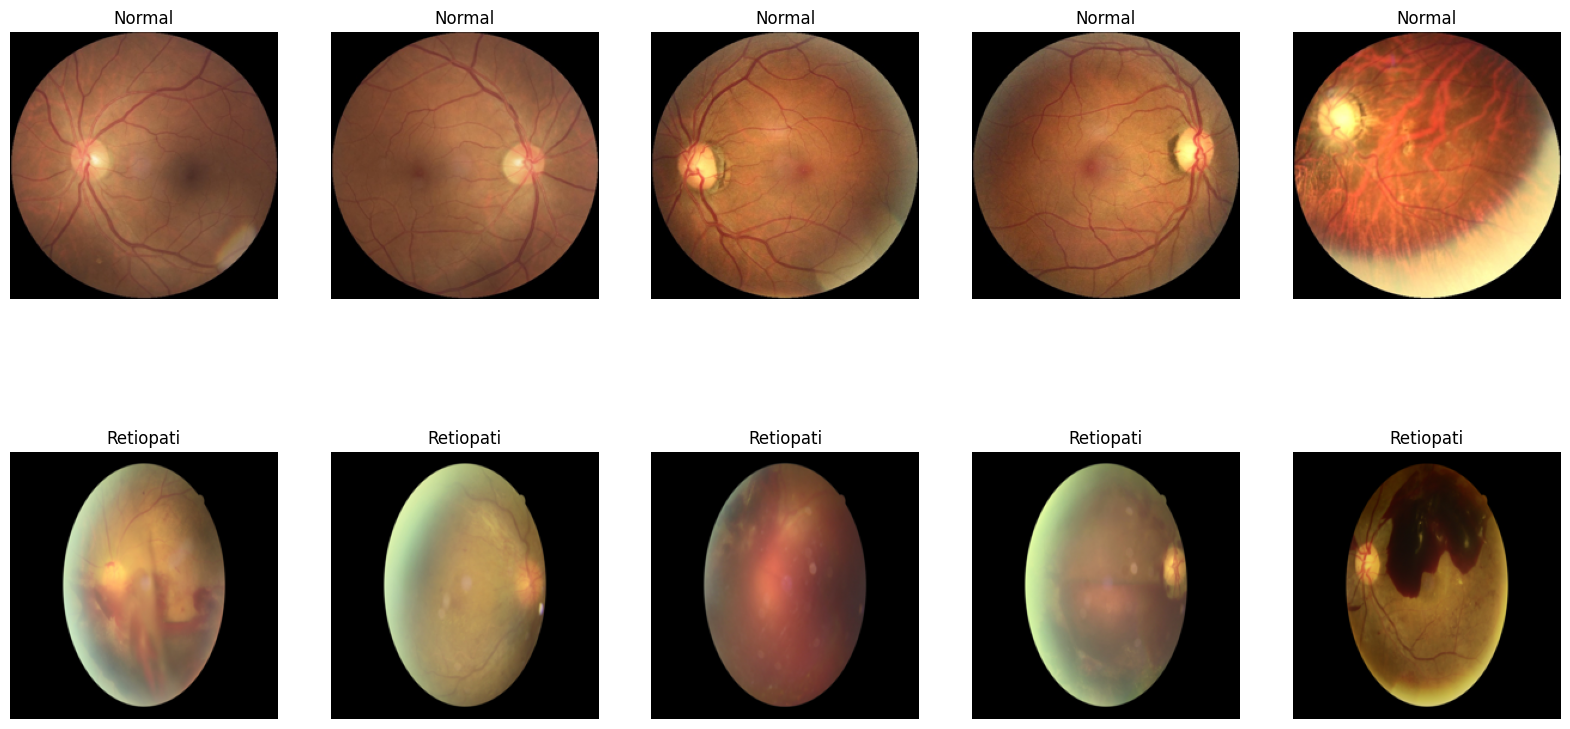

In [24]:
if len(retina_normal_image) >= 5 and len(retina_retinopaty_image) >= 5:
    
    fig, axes = plt.subplots(2, 5, figsize=(20, 10))
    for i in range(5):
        axes[0,i].imshow(retina_normal_image[i])
        axes[0,i].set_title("Normal")
        axes[0,i].axis('off')
        
    for i in range(5):
        axes[1,i].imshow(retina_retinopaty_image[i])
        axes[1,i].set_title("Retiopati")
        axes[1,i].axis("off")

    plt.show()
else :
    print("Gambar tidak cukup")


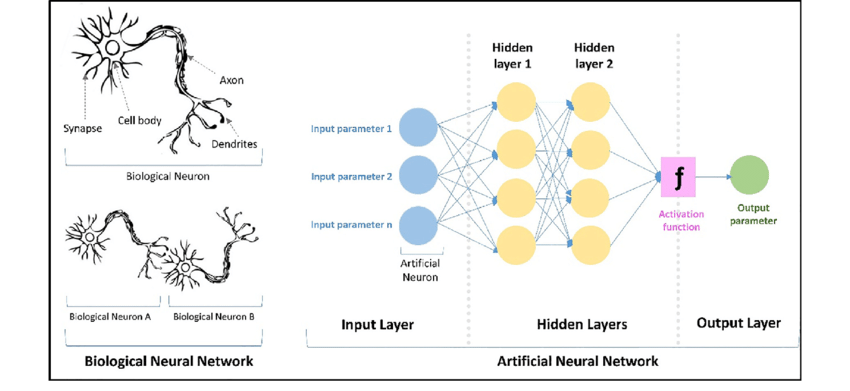

In [ ]:
from IPython.display import Image, display

display(Image(filename='Rumuspng.png'))

# 5. Melatih Data

In [26]:
berhenti = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(train_batch, validation_data=val, epochs=20, callbacks=[berhenti],  verbose=1)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.7850 - loss: 27.4105 - val_accuracy: 0.4825 - val_loss: 2.1404
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.9089 - loss: 1.6228 - val_accuracy: 0.8444 - val_loss: 1.8205
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 52s 906ms/step - accuracy: 0.9192 - loss: 1.3619 - val_accuracy: 0.5136 - val_loss: 1.6137
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.9173 - loss: 1.1895 - val_accuracy: 0.8988 - val_loss: 1.4470
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 52s 909ms/step - accuracy: 0.9172 - loss: 1.0453 - val_accuracy: 0.7121 - val_loss: 1.2744
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.9281 - loss: 0.8717 - val_accuracy: 0.7626 - val_loss: 1.1549
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.9083 - loss: 0.7640 - val_accuracy: 0.9261 - val_loss: 0.7752
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 52s 903ms/step - accuracy: 0.8840 - loss: 0.7565 - val_accuracy: 0.933

# Test Akurasi

In [32]:
# Evaluasi model di data testing setelah training selesai
evaluasi = model.evaluate(test_batch, verbose=1)

print(f"Test Loss: {evaluasi[0]:.4f}")
print(f"Test Accuracy: {evaluasi[1]*100:.2f}%")

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - accuracy: 0.9294 - loss: 0.4186
Test Loss: 0.4013
Test Accuracy: 93.41%


<function matplotlib.pyplot.show(close=None, block=None)>

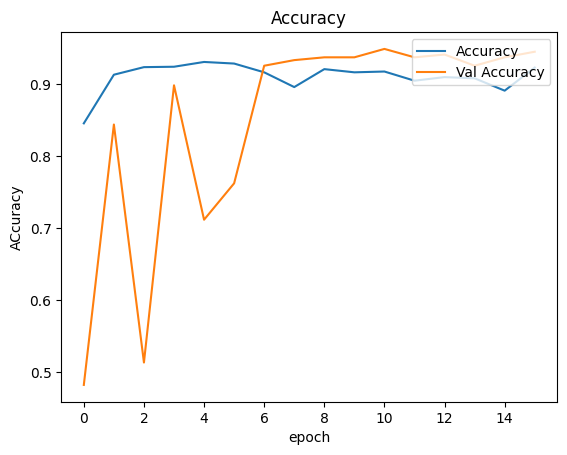

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy', 'Val Accuracy'], loc = 'upper right')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('ACcuracy')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

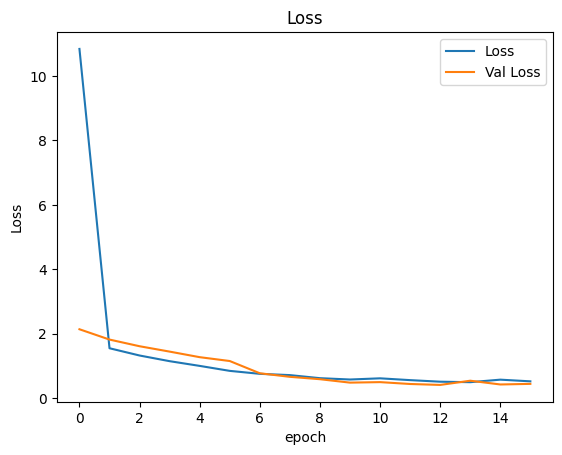

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Val Loss'], loc = 'upper right')
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show

In [ ]:
# save model
# model.export("D:\\Data Sains dan Analitis\\Pertemuan 16 Project Akhir\\Deteksi_retina")
model.save_weights("D:\\Data Sains dan Analitis\\Pertemuan 16 Project Akhir\\Deteksi_retina\\retina_slim.h5")

In [49]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import clear_output
from tensorflow.keras.models import load_model


output = widgets.Output()
display(output) 
train = load_model(r"D:\Data Sains dan Analitis\Pertemuan 16 Project Akhir\Deteksi_retina\retina_slim.h5")

def load_and_preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((224, 224)) 
    img = np.array(img) / 255.0
    return img

def predict_image(image_path, model):
    img = load_and_preprocess_image(image_path)
    img = np.expand_dims(img, axis=0)
    result = model.predict(img)
    print(f'Probabilitas Retinopati: {result[0][0]}')  # <-- ini muncul di bawah cell
    return 'Retina Retinopati' if result[0][0] > 0.5 else 'Retina Normal'


def on_file_upload(change):
    if change['new']:
        for uploaded_file in change['new']:
            with open(uploaded_file['name'], 'wb') as f:
                f.write(uploaded_file['content'])
                
            with output:
                clear_output()  
                print("Memproses gambar, harap tunggu...") 
            

            img_path = uploaded_file['name']  
            img = load_and_preprocess_image(img_path)
            prediction = predict_image(img_path, train)
            # Tampilkan gambar
            print(f'Hasil Deteksi untuk gambar {uploaded_file["name"]}:')
            plt.imshow(img)
            plt.axis('off')
            fig, ax = plt.subplots(figsize=(5, 0.5))  # Ukuran figure untuk teks
            ax.text(0.5, 0.5, f'Hasil Deteksi: {prediction}', ha='center', va='center', fontsize=12)
            ax.axis('off')  
            plt.show() #Hasil
            
# File Upload
upload_widget = widgets.FileUpload(accept='.jpg,.jpeg,.png', multiple=False)
upload_widget.observe(on_file_upload, names='value')
display(upload_widget)


Output()

FileUpload(value=(), accept='.jpg,.jpeg,.png', description='Upload')